# Bag-Of-Words : 
* It is a commonly used approach for **text classification** purposes.[**Text Vectorization**]
* To use ML models on text, we need it to convert them into numbers. So the process of converting tokens into numbers is called **Vectorization**.
* We use **Bag-Of-Words** technique for vectorizing text.
* Bag-Of-Word doesn't consider the position of word in a document. Instead, it drops all the words in a big-bag and count the number of times each word appears in each document.
* In order to get the vector for each token, we need to build the **Document-Term Matrix**.
* **Document-Term Matrix (DTM)** describes the **frequency of terms** that occur in a **collection of documents** and is used as input to a ML classifier.
* In Document-Term Matrix :
    - Each Row -> Each Document
    - Each Column -> Each Token
* **Size of DTM = (# of Documents) * (Size of Vocabulary)**
* **Vector size** of each token equals the **number of documents** in the corpus
* Vector of each word is used as the feature for training a classifier.
* **Corpus :** is set of documents or texts

In [1]:
#Creating a Document-Term Matrix

# Define the corpus
corpus = [
    "2 cups of flour",
    "replace the flour",
    "replace the keyboard in 2 minutes",
    "do you prefer Windows or Mac",
    "the Mac has the most noisy keyboard"
]

# Import and instantiate the vectorizer fro scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

# Apply the vectorizer to the corpus
X = vectorizer.fit_transform(corpus)

# Display the Document-term Matrix as a DataFarme inorder to show the tokens

import pandas as pd

# Extract the token names (Vocabulary)
vocab = vectorizer.get_feature_names_out()

# Create a DataFrame to store the matrix
docterm = pd.DataFrame(X.todense(), columns=vocab)

docterm

,cups,do,flour,has,in,keyboard,mac,minutes,most,noisy,of,or,prefer,replace,the,windows,you
0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0
3,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1
4,0,0,0,1,0,1,1,0,1,1,0,0,0,0,2,0,0


* **Reduce the Vocabulary size :**
    - Vocabulary sixe directly impacts the document-term matrix dimension.
    - Therefore, reducing the vocabulary size is essential to avoid performing calculations over gigantic matrices.
    - Idea of reducing the vocabulary size if to **remove as many tokens as possible without throwing away relevant information**
        * One strategy can be to filter out words that are **either too frequent or too rare**
        * Another process involves applying of **dimension reduction techniques (PCA)** to document-term matrix.

* **Sparse Matrix :** Bag of words approach results in a **document-term matrix** that is, for most part, **filled with zeros**

### Building a classifier model using Bag-Of-Words :
1. Feature extraction [**Vectorizing a corpus**]
2. Splitting the dataset into training(70%) and testing set(30%) to simulate the moel's behavior on previously unseen data.
3. Train the model on training set
4. Evaluate the model's performance on the test set using the metrics such as **accuracy, recall, AUC(Area Under Curve) or by inspecting the confusion matrix**

In [2]:
# Load the datasets
# We are using the classic Brown Corpus
data = pd.read_csv("./Data/brown_corpus_extract_humor_science_fiction.csv")
data.shape

(2000, 2)

In [3]:
data.head()

,topic,text
0,humor,"They were always leaping to light cigarettes, ..."
1,science_fiction,"No, the fish could eat their bodies for all th..."
2,science_fiction,"Fighting pleasure itself, he begged B'dikkat t..."
3,science_fiction,that is all I can tell you about them.
4,humor,"That's one thing I've never done , she said p..."


In [4]:
# Let's see the topic counts
data.topic.value_counts()

topic
humor              1052
science_fiction     948
Name: count, dtype: int64

In [5]:
# Import the spaCy and load the "small English" model
import spacy

nlp = spacy.load("en_core_web_sm")

Steps involved in preprocessing the data :
* Tokenization
* Removing Stopwords and punctuations
* Lemmatization

In [6]:
# Let's define a function which does.....
# ....all the above mentioned steps as a part of preprocess of data

def preprocess(text):
    doc = nlp(text) # Tokenization
    
    # Removing Stopwords and punctuations and storing lemmas
    tokens = [tk.lemma_ for tk in doc if not (tk.is_stop or tk.is_punct)] 
    
    # Returnig the preprocessed data in form of text(strings format), not in form of tokens
    return ' '.join(tokens)

In [7]:
# Let's check whether the function works properly or not

text = "These are good times, leave your cares behind."

preprocess(text)

'good time leave care'

In [8]:
# Adding couple of punctuations with multi characters as stopwords to the nlp spacy model
nlp.Defaults.stop_words.add("`,")
nlp.Defaults.stop_words.add("``")

In [9]:
# Lets apply the preproess function to the enitre corpus text
data['processedText'] = data.text.apply(lambda txt : preprocess(txt))

* Short text with just a few tokens won't have enough information for the classification model that want to train.
* So, let's add a count of the number of tokens for each text and 
* Filter out the texts with **< N** tokens.

In [10]:
# Adding the 'token_count' column for each text 
data['token_count'] = data.text.apply(lambda txt : len(txt.split()))

In [11]:
data.head()

,topic,text,processedText,token_count
0,humor,"They were always leaping to light cigarettes, ...",leap light cigarette open car door fill plate ...,38
1,science_fiction,"No, the fish could eat their bodies for all th...",fish eat body Sturch care,12
2,science_fiction,"Fighting pleasure itself, he begged B'dikkat t...",fight pleasure beg B'dikkat check record tell ...,20
3,science_fiction,that is all I can tell you about them.,tell,9
4,humor,"That's one thing I've never done , she said p...",thing say promptly,10


In [12]:
data.token_count.describe()

count    2000.0000
mean       15.5950
std        11.2615
min         1.0000
25%         7.0000
50%        13.0000
75%        21.0000
max        83.0000
Name: token_count, dtype: float64

<Axes: >

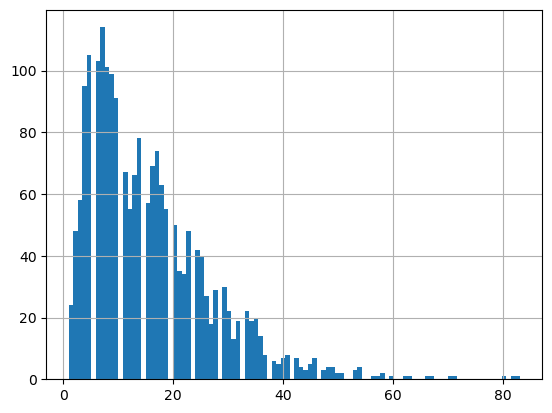

In [13]:
data.token_count.hist(bins=100)

* Let's remove the texts with **tokens <= 4**

In [17]:
data = data[data.token_count > 4]
data.reset_index(inplace=True, drop=True)

<Axes: >

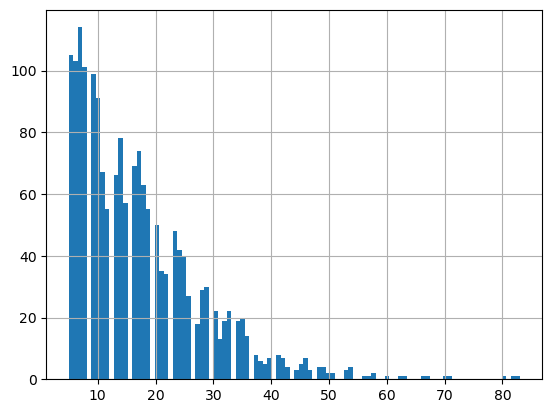

In [18]:
data.token_count.hist(bins=100)

In [20]:
data.topic.value_counts()

topic
humor              965
science_fiction    810
Name: count, dtype: int64

In [21]:
data[data.token_count > 4].topic.value_counts()

topic
humor              965
science_fiction    810
Name: count, dtype: int64

* Above two cells is for checking in two ways whether the topics has same count after removing text which has **token count below 4**
* Now **Vectorize** the texts in the dataframe

In [22]:
# We use CountVectorizer for vectorizing the data
# We have instantiated CountVectorizer as 'vectorizer', and we gonna use the same here
X = vectorizer.fit_transform(data.processedText)

In [23]:
X.shape

(1775, 4956)

* Now **X** is a sparse matrix with **1775** rows(or **documents**) and **4956** columns(or **Vocabulary Size**)
* Lets transform **topic** from **string** to **integer** 

In [25]:
# For the topic == 'humor', we set the 'topic=0'
data.loc[data.topic == 'humor', 'topic'] = 0

# For the topic == 'science_fiction', we set the 'topic=1'
data.loc[data.topic == 'science_fiction', 'topic'] = 1

# Conver the topic value to 'integer' type
data.topic = data.topic.astype(int)

C:\Users\prajw\AppData\Local\Temp\ipykernel_2704\3773093263.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.topic = data.topic.astype(int)


In [26]:
# Let's define the target variable
y = data.topic

So now we have : 
* X -> Features with labels
* y -> Label

#### Train a Classifier
* The **Navie Bayes** classifier performs well on the texts.
* We use **MultinomialNB** model for this

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Create an instance of the ML model
clf = MultinomialNB()

# Train the model
clf.fit(X, y)

# Make predictions 
y_predict = clf.predict(X)

# Calculate and display the accuracy score of the model
print(f"Accuracy Score : {accuracy_score(y, y_predict)}")

Accuracy Score : 0.9538028169014084


* It shows that 95.4% of the texts are correctly classified 
* But we have trained and tested using the same entire data.
* So now lets split the data into training and testing set (Splitting has to be done after the Vectorization of the text)

In [28]:
from sklearn.model_selection import train_test_split

# Splitting the data with seting test set size to 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
print(f'Shape of the X_train : {X_train.shape}')
print(f'Shape of the X_test : {X_test.shape}')

Shape of the X_train : (1242, 4956)
Shape of the X_test : (533, 4956)


In [30]:
# Now lets use the same model to train on these datasets
clf = MultinomialNB()

clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

print(f"Accuracy Score : {accuracy_score(y_test, y_predict)}")

Accuracy Score : 0.7467166979362101


By looking at the above accuracy score, we can mark the above trained model with entier dataset as **OVERFIT** model. And now after splitting, we have got around **74.7%** accuracy.

## Tf-Idf Vectorizer :
* Type of vectorizer, which will calculates the **weight for each word** based on it's **frequency in the document** and it's **rarity across the entire corpus of documents**.
* By normalizing word counts, we can focus more on the **relative importance of words in individual documents or across a corpus**, rather than their raw occurance counts.
* **Tf :** Term frewuency, the number of times the word appears in each document.
* **Idf :** Inverse Document Frequency, an inverse count of the number of documents a word is in the whole coorpus
    - **(Number of documents) / (Number of documents that contain the term t)**

* **tf-idf score :** is a decimal number that measures the importance of a word in any document. It gives **small values to frequent** words across the corpus and **larger values to less** common ones.
    - **tf-idf score = tf * idf**



In [32]:
corpus = [
    '2 cups of flour',
    'replace the flour',
    'replace the keyboard in 2 minutes',
    'do you prefer Windows or Mac',
    'the Mac has the most noisy keyboard',
]

# Import the Tf-idf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfIdfVc = TfidfVectorizer()

# Apply the vectorizer to the document
X = tfIdfVc.fit_transform(corpus)

#  Extract the token names
vocab = tfIdfVc.get_feature_names_out()

# Dataframe to display the matrix
docterm = pd.DataFrame(X.todense(), columns=vocab)
docterm

,cups,do,flour,has,in,keyboard,mac,minutes,most,noisy,of,or,prefer,replace,the,windows,you
0,0.614189,0.000000,0.495524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.614189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.609818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609818,0.506204,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.516374,0.416607,0.000000,0.516374,0.000000,0.000000,0.000000,0.000000,0.000000,0.416607,0.345822,0.000000,0.000000
3,0.000000,0.420669,0.000000,0.000000,0.000000,0.000000,0.339393,0.000000,0.000000,0.000000,0.000000,0.420669,0.420669,0.000000,0.000000,0.420669,0.420669
4,0.000000,0.000000,0.000000,0.405025,0.000000,0.326771,0.326771,0.000000,0.405025,0.405025,0.000000,0.000000,0.000000,0.000000,0.542500,0.000000,0.000000


 Let's apply the `TfidfVectorizer` to the **Brown corpus** to check how the model would do better compared to `CountVectorizer`

In [33]:
# Separating the features(X) and label(y)
X = tfIdfVc.fit_transform(data.processedText)
y = data.topic

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# instantiate and Train the model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Make predictions
y_predict = clf.predict(X_test)

# Calculate and disply the accuracy score
print(f"Accuracy Score of Tfidf Vectorizer : {accuracy_score(y_test, y_predict)}")

Accuracy Score of Tfidf Vectorizer : 0.7804878048780488


As you can see that the `TfidfVectorizer` has got the accuracy of **78%**, which is slightly better than `CountVectorizer`